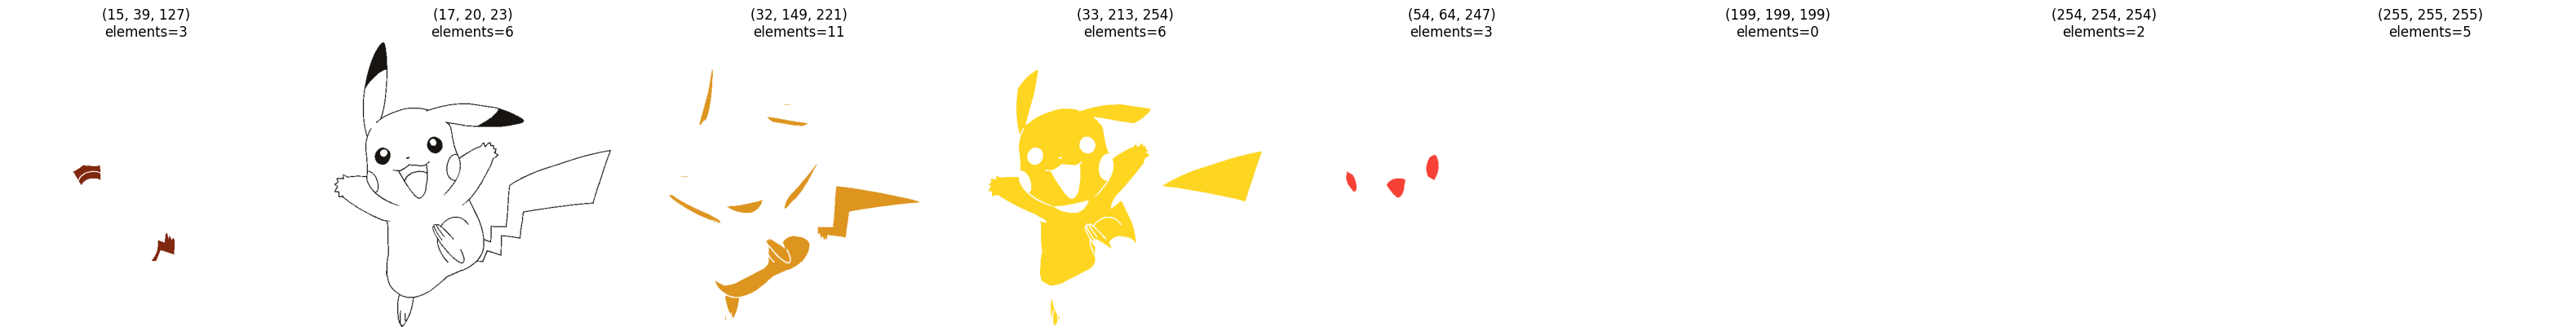

Color (15, 39, 127): 3 distinct elements
Color (17, 20, 23): 6 distinct elements
Color (32, 149, 221): 11 distinct elements
Color (33, 213, 254): 6 distinct elements
Color (54, 64, 247): 3 distinct elements
Color (199, 199, 199): 0 distinct elements
Color (254, 254, 254): 2 distinct elements
Color (255, 255, 255): 5 distinct elements
Total elements: 36


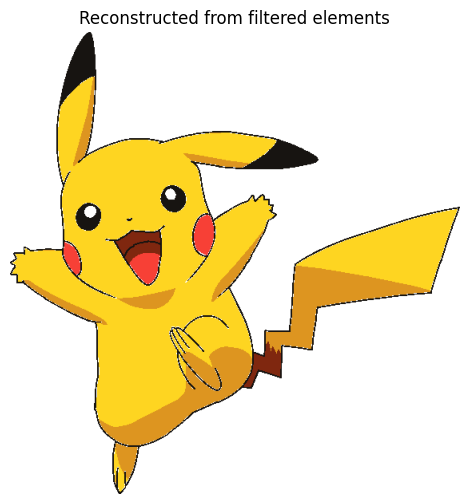

In [12]:
# ──────────────────────────────────────────────────────────────────────────────
# CELL N+3: Per‑color filtered elements visualization + reconstruction
# ──────────────────────────────────────────────────────────────────────────────
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1) Load your quantized image
path = "Pikachu_quant.png"    # adjust as needed
img = cv2.imread(path)
bgr = img[:, :, :3]

# 2) Build the palette of unique colors
palette = np.unique(bgr.reshape(-1, 3), axis=0).tolist()

# 3) Set retrieval & approximation (not used for filling, but kept for contour count)
mode   = cv2.RETR_TREE
method = cv2.CHAIN_APPROX_SIMPLE

# 4) Prepare subplots: one per color
n_colors = len(palette)
fig, axes = plt.subplots(1, n_colors,
                         figsize=(4 * n_colors, 4),
                         constrained_layout=True)
if n_colors == 1:
    axes = [axes]

# 5) Containers for totals and elements
elements_by_color = {}
MIN_SIZE = 10  # minimum pixel count to keep

# 6) Loop per color
for ax, colour in zip(axes, palette):
    col = tuple(int(c) for c in colour)
    # mask that color
    mask = cv2.inRange(bgr, np.array(col), np.array(col))

    # connected components → distinct elements (hole‑free)
    num_labels, labels = cv2.connectedComponents(mask)
    elements = []
    for lbl in range(1, num_labels):
        comp_mask = (labels == lbl).astype(np.uint8) * 255
        if cv2.countNonZero(comp_mask) <= MIN_SIZE:
            continue
        elements.append(comp_mask)
    elements_by_color[col] = elements

    # build a white canvas, then fill each kept element
    canvas = np.full_like(bgr, 255)
    for comp_mask in elements:
        canvas[comp_mask.astype(bool)] = col

    # display per‑color filtered elements
    ax.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
    ax.set_title(f"{col}\nelements={len(elements)}")
    ax.axis("off")

plt.show()

# 7) print element counts
total_elements = sum(len(elems) for elems in elements_by_color.values())
for col, elems in elements_by_color.items():
    print(f"Color {col}: {len(elems)} distinct elements")
print(f"Total elements: {total_elements}")

# 8) Reconstruct full image from extracted elements
recon = np.full_like(bgr, 255)
for col, elems in elements_by_color.items():
    for comp_mask in elems:
        recon[comp_mask.astype(bool)] = col

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(recon, cv2.COLOR_BGR2RGB))
plt.title("Reconstructed from filtered elements")
plt.axis("off")
plt.show()
